In [1]:
import pandas as pd

In [2]:
 data = pd.read_csv("affair_data.csv")

In [3]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
X = pd.get_dummies(data, columns=["occupation", "occupation_husb", "religious"])

In [6]:
X.head()


,rate_marriage,age,yrs_married,children,educ,affair,occupation_1.0,occupation_2.0,occupation_3.0,occupation_4.0,...,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0,religious_1.0,religious_2.0,religious_3.0,religious_4.0
0,3.0,32.0,9.0,3.0,17.0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3.0,27.0,13.0,3.0,14.0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,4.0,22.0,2.5,0.0,16.0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,16.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,14.0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [7]:
Y = X["affair"].copy()

In [8]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: affair, dtype: int64

In [9]:
X = X.drop("affair", axis=1) #del X['affair']

In [10]:
X.head()

,rate_marriage,age,yrs_married,children,educ,occupation_1.0,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,...,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0,religious_1.0,religious_2.0,religious_3.0,religious_4.0
0,3.0,32.0,9.0,3.0,17.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3.0,27.0,13.0,3.0,14.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,4.0,22.0,2.5,0.0,16.0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,16.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,14.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [11]:
model = LogisticRegression()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state=0)

In [14]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
predictions = model.predict_proba(X_test)

In [20]:
predictions

array([[ 0.35416875,  0.64583125],
       [ 0.92404715,  0.07595285],
       [ 0.72946701,  0.27053299],
       ..., 
       [ 0.56092669,  0.43907331],
       [ 0.81398769,  0.18601231],
       [ 0.73570192,  0.26429808]])

In [16]:
for line in zip(predictions[:,1], y_test):
    print(line)

(0.64583125427503951, 0)
(0.075952847182852209, 0)
(0.27053299328827152, 0)
(0.26942106190400184, 0)
(0.26429807683875906, 1)
(0.14428625291343539, 0)
(0.17864118088888128, 0)
(0.21881876030493655, 0)
(0.75272836914511165, 1)
(0.26902521665675405, 0)
(0.11218378027948142, 0)
(0.18740976939353737, 0)
(0.081860475233584112, 0)
(0.31117182560402246, 0)
(0.72820379151637149, 1)
(0.59178878201304952, 0)
(0.28637638767722984, 0)
(0.7213439760280792, 1)
(0.29509619097709971, 0)
(0.15675886904292299, 0)
(0.2161021834226772, 1)
(0.46224707349387573, 1)
(0.076802896078115857, 1)
(0.45785988325760124, 1)
(0.17663596233311327, 0)
(0.17444008087694807, 0)
(0.40760539238585514, 0)
(0.38030223511820688, 0)
(0.24747857435969192, 0)
(0.11162658420205256, 0)
(0.14522679741962835, 0)
(0.30079107684014178, 1)
(0.20312541894163944, 0)
(0.49656092375047367, 1)
(0.61990393431479696, 1)
(0.39290013520076345, 1)
(0.10952838879058219, 0)
(0.18921358248671311, 0)
(0.28724221650579346, 1)
(0.15181522869471628, 0)

(0.39279640186137277, 1)
(0.15555716699256308, 0)
(0.67662145397549267, 0)
(0.08993106444813978, 0)
(0.16502458861100555, 0)
(0.40290347329869297, 1)
(0.38166967427570919, 0)
(0.46942028890613846, 0)
(0.39369539871344494, 0)
(0.50894729477053657, 0)
(0.32329703082811384, 0)
(0.57989312526171555, 1)
(0.14187177436771312, 0)
(0.084981357080326808, 0)
(0.09257126350160215, 0)
(0.15494534734522633, 1)
(0.08825715367612684, 0)
(0.2332229160117984, 0)
(0.30133517938752707, 0)
(0.25506428434098943, 0)
(0.27946841575736026, 1)
(0.087019047143877218, 0)
(0.5643527469319235, 0)
(0.058146120457638228, 0)
(0.45794507265969731, 0)
(0.63170896545131228, 0)
(0.24871686348563851, 0)
(0.096569069858545145, 0)
(0.11179828718167054, 0)
(0.18166038226935094, 0)
(0.56426461124690941, 1)
(0.21934282366940772, 0)
(0.31117182560402246, 0)
(0.082564199685326481, 0)
(0.25476461430222669, 0)
(0.11580438748301748, 0)
(0.18164922086692772, 0)
(0.39440816873723816, 1)
(0.38872214823347034, 0)
(0.15421035268824024, 

In [17]:
from sklearn.metrics import precision_recall_curve

In [18]:
precision, recall, threshold = precision_recall_curve( y_test, predictions[:, 1] )

In [21]:
for line in zip(precision, recall, threshold):
    print(line)

(0.32373333333333332, 1.0, 0.068869209892387956)
(0.3233724653148346, 0.99835255354200991, 0.06909224077184245)
(0.32354511478910836, 0.99835255354200991, 0.069328084061804435)
(0.32371794871794873, 0.99835255354200991, 0.07047895285631027)
(0.32389096739711382, 0.99835255354200991, 0.070750434489226757)
(0.32406417112299463, 0.99835255354200991, 0.072011631562073561)
(0.32423756019261635, 0.99835255354200991, 0.072388598096228593)
(0.32387580299785867, 0.99670510708401971, 0.073836222021992054)
(0.32404927691483665, 0.99670510708401971, 0.073842831086028543)
(0.32422293676312969, 0.99670510708401971, 0.073958086367517994)
(0.32439678284182305, 0.99670510708401971, 0.074148612210951995)
(0.32457081545064376, 0.99670510708401971, 0.074787617170636631)
(0.32474503488996243, 0.99670510708401971, 0.075952847182852209)
(0.32509403546480387, 0.99670510708401971, 0.076042116295587894)
(0.32526881720430106, 0.99670510708401971, 0.076131054562874834)
(0.32544378698224852, 0.99670510708401971, 0

(0.46439317953861586, 0.76276771004942334, 0.26924345764536145)
(0.46385542168674698, 0.76112026359143325, 0.26931264561180029)
(0.46432160804020101, 0.76112026359143325, 0.26941164460961237)
(0.46478873239436619, 0.76112026359143325, 0.26942106190400184)
(0.46525679758308158, 0.76112026359143325, 0.26963053018809424)
(0.46572580645161288, 0.76112026359143325, 0.26970374942294517)
(0.46619576185671041, 0.76112026359143325, 0.27024722993463102)
(0.46666666666666667, 0.76112026359143325, 0.27053299328827152)
(0.4671385237613751, 0.76112026359143325, 0.27176077609625154)
(0.46761133603238869, 0.76112026359143325, 0.27324112880971613)
(0.46808510638297873, 0.76112026359143325, 0.27364765779905154)
(0.46855983772819471, 0.76112026359143325, 0.27425309843901446)
(0.46903553299492384, 0.76112026359143325, 0.27503665535761834)
(0.4684959349593496, 0.75947281713344317, 0.27516635063091627)
(0.46795523906408953, 0.75782537067545308, 0.27542382493904249)
(0.46843177189409368, 0.75782537067545308,

In [23]:
%matplotlib inline

In [24]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


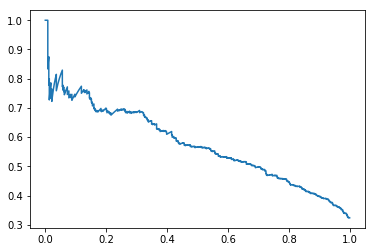

In [25]:
plt.plot(recall, precision)

In [33]:
from sklearn.metrics import average_precision_score

In [34]:
average_precision_score(y_test, predictions[:, 1] )

0.57632724770365606

In [26]:
from sklearn.metrics import roc_curve

In [27]:
fp_rate, tp_rate, threshold = roc_curve(y_test, predictions[:, 1])

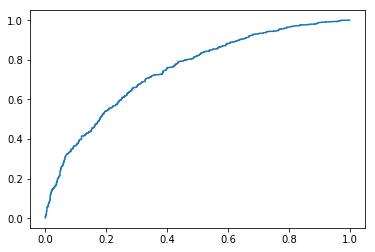

In [28]:
plt.plot(fp_rate, tp_rate)

In [32]:
fp_rate

array([  0.00000000e+00,   0.00000000e+00,   7.67459708e-04,
         7.67459708e-04,   1.53491942e-03,   1.53491942e-03,
         2.30237913e-03,   2.30237913e-03,   3.06983883e-03,
         3.06983883e-03,   3.83729854e-03,   3.83729854e-03,
         5.37221796e-03,   5.37221796e-03,   7.67459708e-03,
         7.67459708e-03,   8.44205679e-03,   8.44205679e-03,
         9.20951650e-03,   9.20951650e-03,   9.97697621e-03,
         9.97697621e-03,   1.15118956e-02,   1.15118956e-02,
         1.30468150e-02,   1.30468150e-02,   1.38142748e-02,
         1.38142748e-02,   1.53491942e-02,   1.53491942e-02,
         1.61166539e-02,   1.61166539e-02,   1.84190330e-02,
         1.84190330e-02,   1.84190330e-02,   1.84190330e-02,
         1.91864927e-02,   1.91864927e-02,   1.99539524e-02,
         1.99539524e-02,   1.99539524e-02,   1.99539524e-02,
         2.14888718e-02,   2.14888718e-02,   2.22563315e-02,
         2.22563315e-02,   2.45587107e-02,   2.45587107e-02,
         2.53261704e-02,

In [31]:
((fp_rate**2 + tp_rate**2)**1/2)

array([  1.35703992e-06,   3.39259979e-05,   3.42204951e-05,
         6.67894531e-05,   6.76729447e-05,   8.80285434e-05,
         8.95010294e-05,   1.66852305e-04,   1.68913785e-04,
         2.34051701e-04,   2.36702176e-04,   6.64169749e-04,
         6.71237682e-04,   1.58316851e-03,   1.59818786e-03,
         1.69182362e-03,   1.69800806e-03,   1.89342181e-03,
         1.90019524e-03,   2.00197324e-03,   2.00933567e-03,
         2.67699930e-03,   2.69349115e-03,   3.06396304e-03,
         3.08281087e-03,   3.47770948e-03,   3.48801688e-03,
         3.90734222e-03,   3.92972400e-03,   4.84165483e-03,
         4.85372921e-03,   7.16476819e-03,   7.20452531e-03,
         7.40129610e-03,   7.80297992e-03,   8.21552005e-03,
         8.22995041e-03,   8.65334687e-03,   8.66836622e-03,
         8.88413557e-03,   9.32381650e-03,   9.54772809e-03,
         9.57953379e-03,   1.05023209e-02,   1.05191073e-02,
         1.07565893e-02,   1.08104822e-02,   1.10506783e-02,
         1.10698206e-02,

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions[:, 1] )

0.74602141048220993